Goal:
Explore the Telecomu Churn dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
1. Why This Project?
- Learn data cleaning with Pandas.

- Use NumPy for calculations (mean, median, etc.).

- Visualize trends using Matplotlib and Seaborn.

- Understand the relationship between  features 


2.import libraries


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

3 Load datset


In [16]:
df=pd.read_csv("tele_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


4 Exploring Dataset


In [17]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

5 Data Cleaning - Not Required ,no missing values found

6 Analysis with Numpys and Pandas

In [18]:
# Average tenure of customers
avg_tenure = np.mean(df['tenure'])
print("Average Tenure:", avg_tenure)

# Churn rate
churn_rate = (df['Churn'] == 'Yes').mean()
print("Overall Churn Rate:", churn_rate)

# Churn rate by contract type
churn_by_contract = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("Churn Rate by Contract Type:\n", churn_by_contract)

# Churn rate by gender
churn_by_gender = df.groupby('gender')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("Churn Rate by Gender:\n", churn_by_gender)

Average Tenure: 32.37114865824223
Overall Churn Rate: 0.2653698707936959
Churn Rate by Contract Type:
 Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64
Churn Rate by Gender:
 gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64


7.Visualization by Matplot

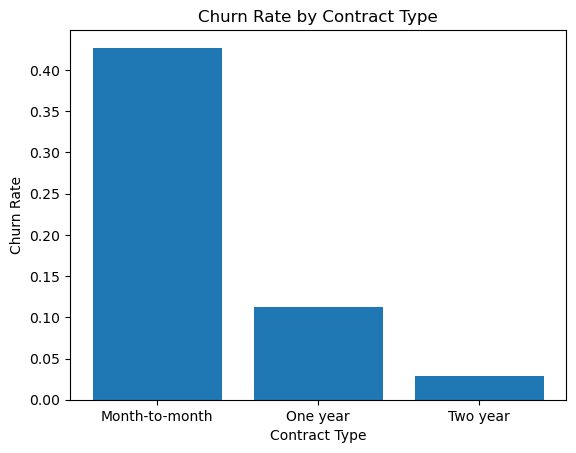

In [19]:
contracts = churn_by_contract.index
rates = churn_by_contract.values
plt.bar(contracts, rates, color='C0')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()

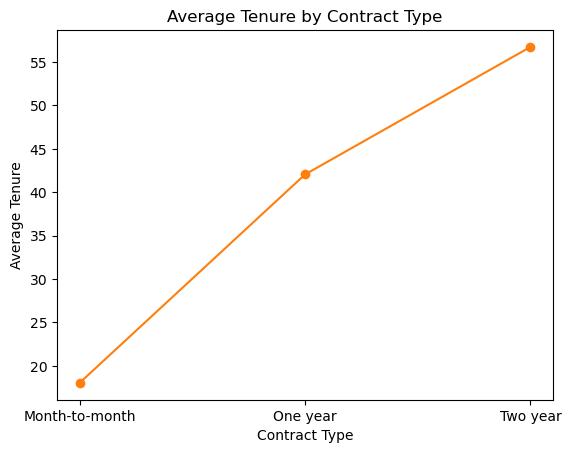

In [20]:
# Line plot of average tenure by contract type
avg_tenure_by_contract = df.groupby('Contract')['tenure'].mean()
plt.plot(avg_tenure_by_contract.index, avg_tenure_by_contract.values, marker='o', color='C1')
plt.title("Average Tenure by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Average Tenure")
plt.show()

8 visualization with seaborn

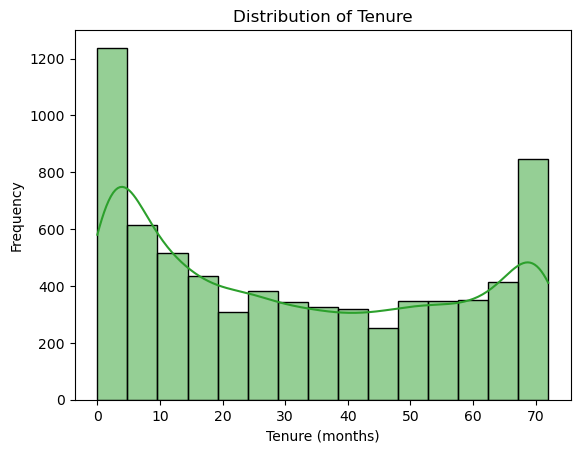

In [21]:
# Histogram of Tenure
sns.histplot(df['tenure'], bins=15, kde=True, color='C2')
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()

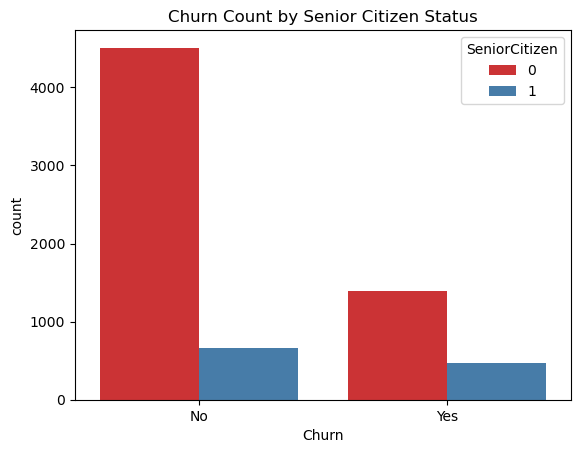

In [22]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df, palette='Set1')
plt.title("Churn Count by Senior Citizen Status")
plt.show()

C:\Users\bsais\AppData\Local\Temp\ipykernel_21776\3436890770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='Pastel1')


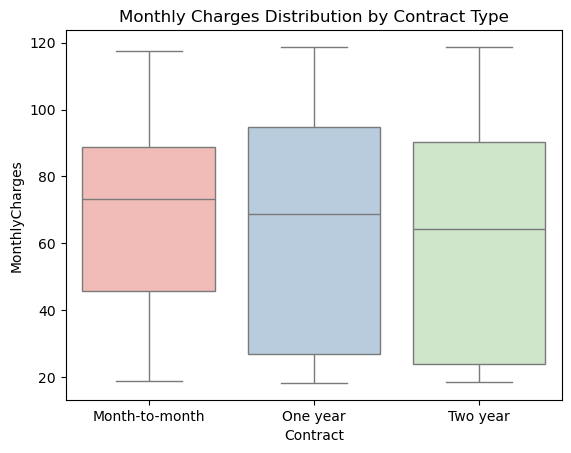

In [23]:
# Boxplot of Monthly Charges by Contract Type
sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='Pastel1')
plt.title("Monthly Charges Distribution by Contract Type")
plt.show()

#### Insights:

1. Customers with a month-to-month contract have the highest churn rate, while those with a two-year contract have the lowest.
2. Longer contract durations are associated with significantly lower churn rates.
3. Customers on one-year contracts have a moderate churn rate, much lower than month-to-month but higher than two-year contracts.

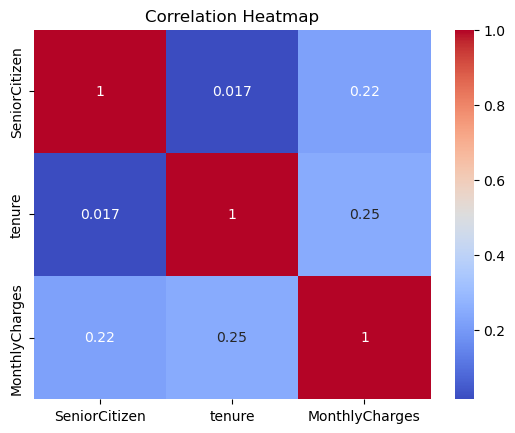

In [24]:
# Correlation heatmap for numerical features
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Insights:

1. Customers with a month-to-month contract have the highest churn rate, while those with a two-year contract have the lowest.
2. Longer contract durations are associated with significantly lower churn rates.
3. Customers on one-year contracts have a moderate churn rate, much lower than month-to-month but higher than two-year contracts.